In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("./apple_quality.csv")
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
data_pulito=data.dropna().copy()
data_pulito

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [8]:
albero_decisionale=tree.DecisionTreeClassifier(max_depth=5,ccp_alpha=0.01)

In [10]:
data.columns[1:-1]


Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [16]:
X=data_pulito[data_pulito.columns[1:-1]].values
y=data_pulito["Quality"].values
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=0)


In [26]:
albero_decisionale.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

In [28]:
albero_decisionale.score(X_train, y_train)

0.7321428571428571

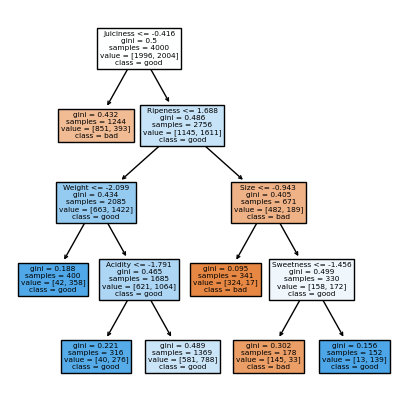

In [23]:
fig, ax=plt.subplots(figsize=(5,5))
tree.plot_tree(albero_decisionale, 
               feature_names=list(data_pulito.columns[1:-1]),
               class_names=list(albero_decisionale.classes_), filled=True)
plt.show()

In [29]:
max_depht_value=30

for  x in range(2, max_depht_value):
    albero_decisionale_penguin=tree.DecisionTreeClassifier(max_depth=x)
    albero_decisionale_penguin.fit(X_train, y_train)
    print(f"max_depht_value: {x}, score: {albero_decisionale_penguin.score(X_train, y_train)}")
    

max_depht_value: 2, score: 0.7039285714285715
max_depht_value: 3, score: 0.7164285714285714
max_depht_value: 4, score: 0.7664285714285715
max_depht_value: 5, score: 0.7814285714285715
max_depht_value: 6, score: 0.8432142857142857
max_depht_value: 7, score: 0.8667857142857143
max_depht_value: 8, score: 0.8892857142857142
max_depht_value: 9, score: 0.9153571428571429
max_depht_value: 10, score: 0.9353571428571429
max_depht_value: 11, score: 0.9471428571428572
max_depht_value: 12, score: 0.9582142857142857
max_depht_value: 13, score: 0.9717857142857143
max_depht_value: 14, score: 0.9821428571428571
max_depht_value: 15, score: 0.9907142857142858
max_depht_value: 16, score: 0.995
max_depht_value: 17, score: 0.9971428571428571
max_depht_value: 18, score: 0.9985714285714286
max_depht_value: 19, score: 0.9996428571428572
max_depht_value: 20, score: 1.0
max_depht_value: 21, score: 1.0
max_depht_value: 22, score: 1.0
max_depht_value: 23, score: 1.0
max_depht_value: 24, score: 1.0
max_depht_value

In [34]:
albero_decisionale_finale=tree.DecisionTreeClassifier(max_depth=20)

In [35]:
albero_decisionale_finale.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [36]:
albero_decisionale_finale.score(X_train, y_train)

1.0

In [37]:
albero_decisionale_finale.score(X_test, y_test)

0.7741666666666667

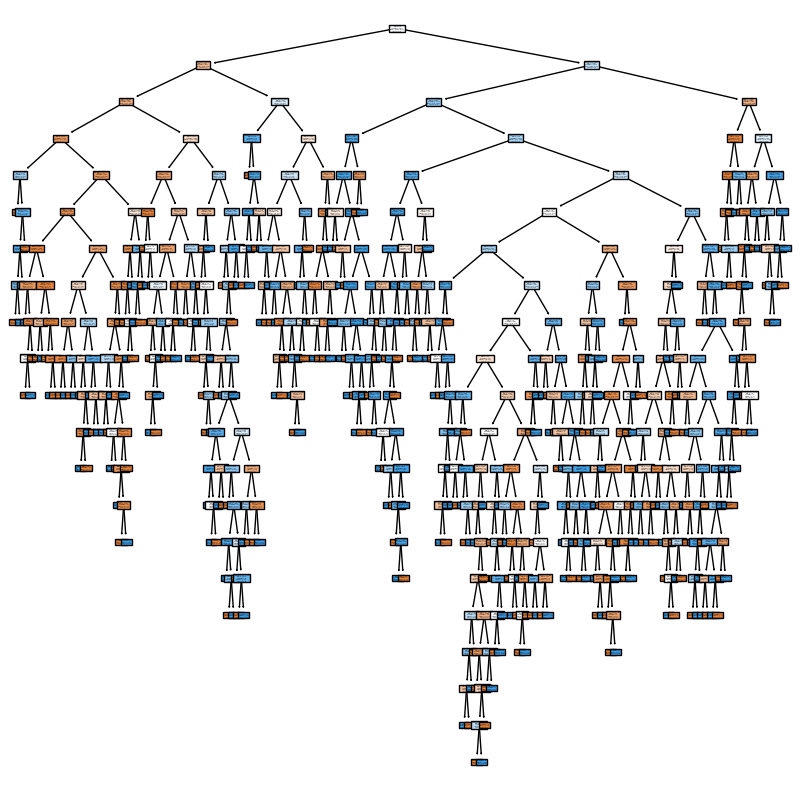

In [39]:
fig, ax=plt.subplots(figsize=(10,10))
tree.plot_tree(albero_decisionale_finale, 
               feature_names=list(data_pulito.columns[1:-1]),
               class_names=list(albero_decisionale.classes_), filled=True)
plt.show()